## **Imports and notebook configs**


In [1]:
'''Imports'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline



## **Dataset observation and properties**

In [2]:
'''load datasets'''

train_df = pd.read_csv('Datasets/SE_rents2018_train.csv')
test_df = pd.read_csv('Datasets/SE_rents2018_test1.csv')


In [3]:
train_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B


In [4]:
test_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7499437,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,...,0,0,2700,1,"By Owner, No Fees!\n\nNewly renovated building...",Little Italy,Manhattan,1B,1.0,B
1,7477903,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,...,0,0,1650,1,this is a beautiful spacious renovated full s...,Bushwick,Brooklyn,C4,4.0,C
2,7481023,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,...,1,0,2900,0,"Garden level, pet-friendly, 2 bedroom, 1 bath ...",Columbia St Waterfront District,Brooklyn,GARDEN,NaN,NaN
3,7479547,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,...,0,0,4750,1,Ivy Park is a boutique condominium with a uniq...,Upper West Side,Manhattan,2C,2.0,C
4,7518814,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,...,0,0,1800,0,Located across from the New East River Plaza w...,East Harlem,Manhattan,9,NaN,NaN


In [5]:
print(f"Train Data Columns:{list(train_df)}\n")
print(f"Test Data Columns:{list(test_df)}\n")

Train Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']

Test Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_ch

## **Data Cleaning**

Lets drop unecessary columns from datasets and save id information

In [6]:
print(f"Train Data Shape Before Drop:{train_df.shape}")
print(f"Test Data Shape Before Drop:{test_df.shape}\n")

# save id columns
train_id = train_df['rental_id']
test_id = test_df['rental_id']

#drop unnecessary columns

train_df.drop(["rental_id","created_at",'description','bin'],axis=1,inplace=True)
test_df.drop(["rental_id","created_at",'description','bin'],axis=1,inplace=True)

print(f"Train Data Shape After Drop: {train_df.shape}")
print(f"Test Data Shape After Drop: {test_df.shape}")

Train Data Shape Before Drop:(12000, 39)
Test Data Shape Before Drop:(2000, 39)

Train Data Shape After Drop: (12000, 35)
Test Data Shape After Drop: (2000, 35)


## **Data Visualization**

We will look at properties of target 'rent' variable

In [7]:
# Target Variable Description: 'rent'

train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

mu: 3605.76
sigma:2.9e+03


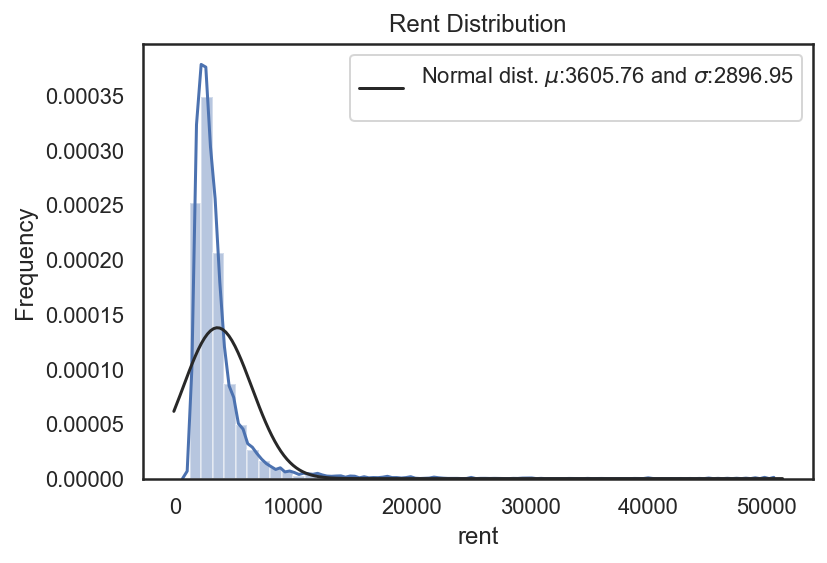

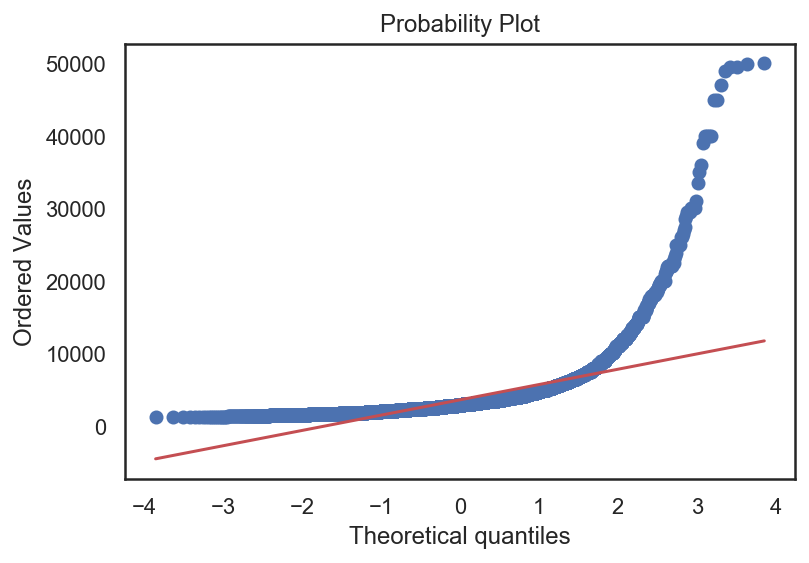

Skewness:6.282718976779915
Kurtosis:64.84190569996547


In [8]:
# Visualize Target Variable

sns.distplot(train_df['rent'], fit=norm)

(mu,sigma)= norm.fit(train_df['rent'])

print(f"mu: {mu:.2f}\nsigma:{sigma:.2}")

plt.legend([f'Normal dist. $\mu$:{mu:.2f} and $\sigma$:{sigma:.2f}\n'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent Distribution')

fig = plt.figure()
res = stats.probplot(train_df['rent'], plot=plt)
plt.show()

print(f"Skewness:{train_df['rent'].skew()}")
print(f"Kurtosis:{train_df['rent'].kurt()}")

### **Observations from target variable**

Skewness suggest:
-Lack of symmetry in rent distribution
-Mean and median are greater than the mode

Kurtosis suggest:
-Heavy tails in distribution
-Lots of outliers in data

## **Visualization of features against rent**

lets divide categorical and numerical datatypes in dataframe

In [9]:
# Categorical Data
train_df.select_dtypes(include=['object']).columns

Index(['addr_unit', 'addr_street', 'addr_city', 'neighborhood', 'borough',
       'unit', 'line'],
      dtype='object')

In [10]:
# Numiercal Data 
train_df.select_dtypes(include=['int64','float64']).columns

Index(['building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'addr_zip',
       'addr_lat', 'addr_lon', 'bbl', 'floor_count', 'year_built',
       'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace',
       'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets',
       'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge',
       'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee',
       'floornumber'],
      dtype='object')

In [11]:
num_categorical = len(train_df.select_dtypes(include=['object']).columns)
num_numerical = len(train_df.select_dtypes(include=['int64','float64']).columns)
print(f"Categorical Features:{num_categorical}\nNumerical Features:{num_numerical}")
print(f"Total Features = {num_categorical+num_numerical}")


Categorical Features:7
Numerical Features:28
Total Features = 35


## **Narrowing Down optimal features**

Lets look at which features would be most important in predicting rent 

Creating a correlations matrix we can observe relationships

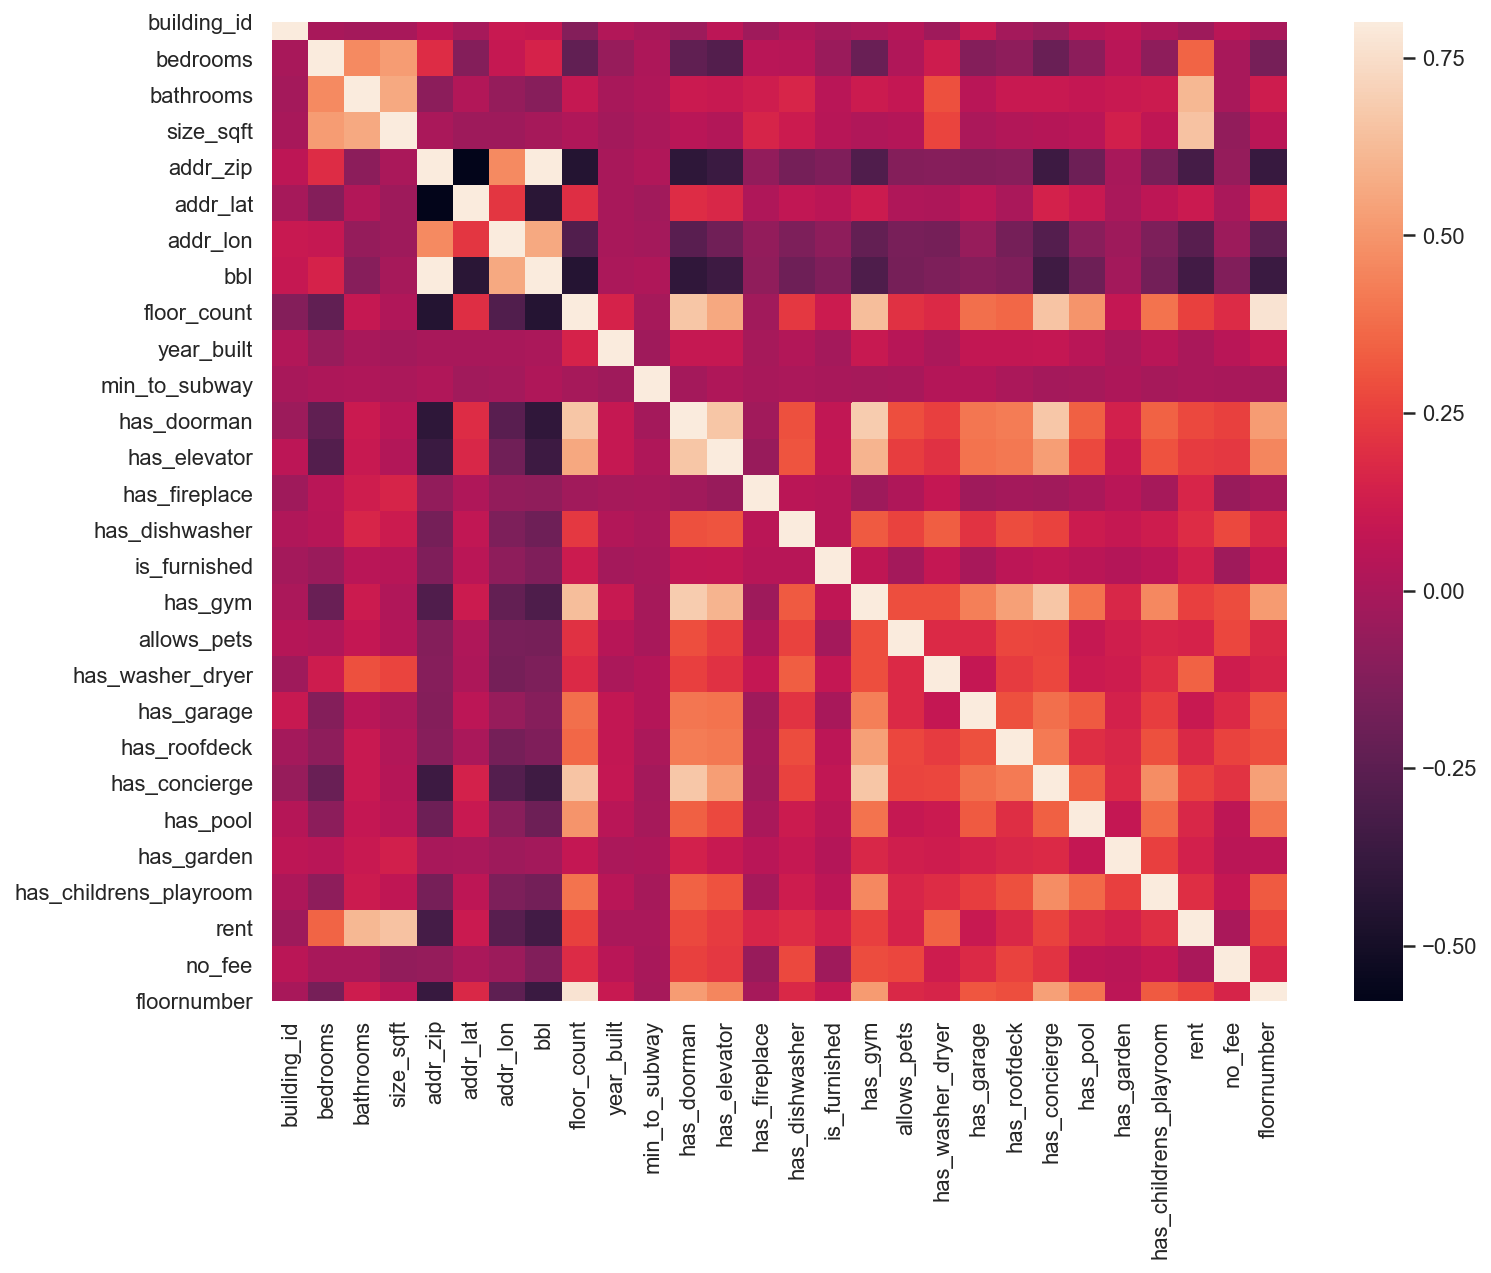

In [12]:
# Correlation Matrix Heatmap

corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

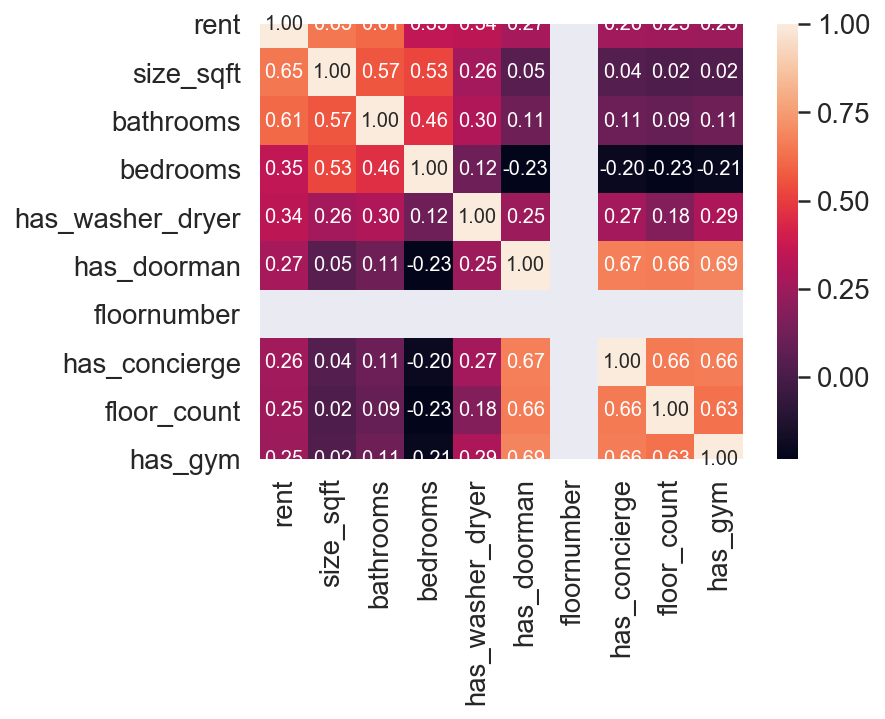

In [13]:
# Top k Heatmap

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rent')['rent'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,rent
1,size_sqft
2,bathrooms
3,bedrooms
4,has_washer_dryer
5,has_doorman
6,floornumber
7,has_concierge
8,floor_count
9,has_gym


## **Visualizing Features with respect to target**

After observing the 10 most correlated features we can plot them 
to visualize how they interact better

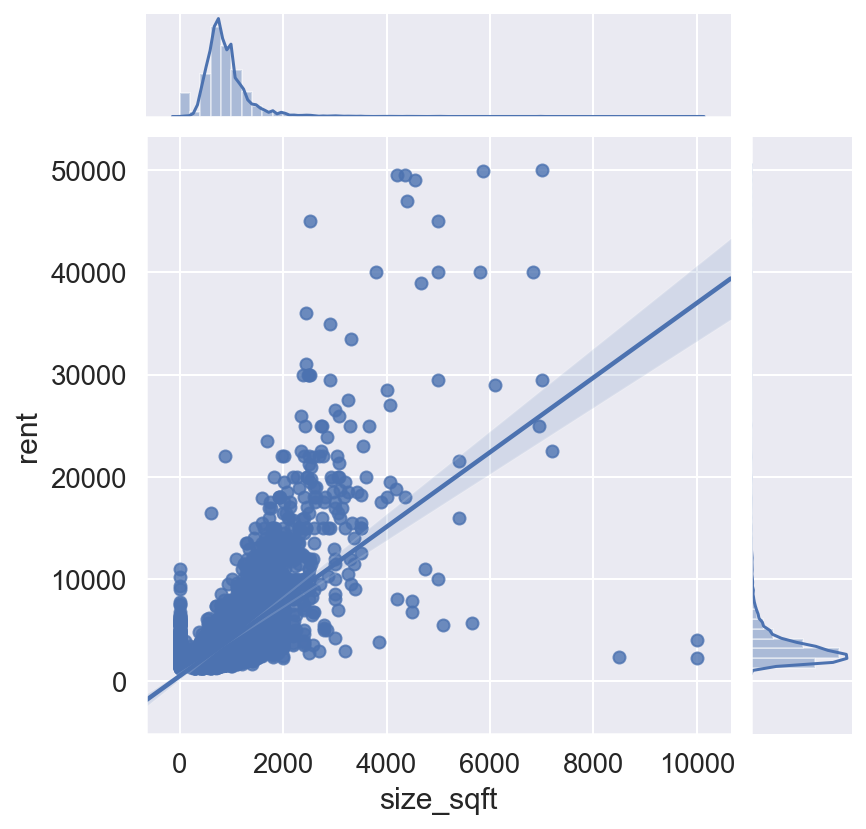

In [15]:
# size_sqft vs rent

sns.jointplot(x=train_df['size_sqft'], y=train_df['rent'], kind='reg')


**Observations**

- size_sqft seems to be positively correlated with rent 
- Outliers exist for size_sqft > 8000
- Potential issues with size_sqft = 0 

Lets remove the outliers as linear regression models are less accurate with tons of outliers

In [16]:
# Remove outliers

train_df = train_df.drop(train_df[(train_df['size_sqft']>8000) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

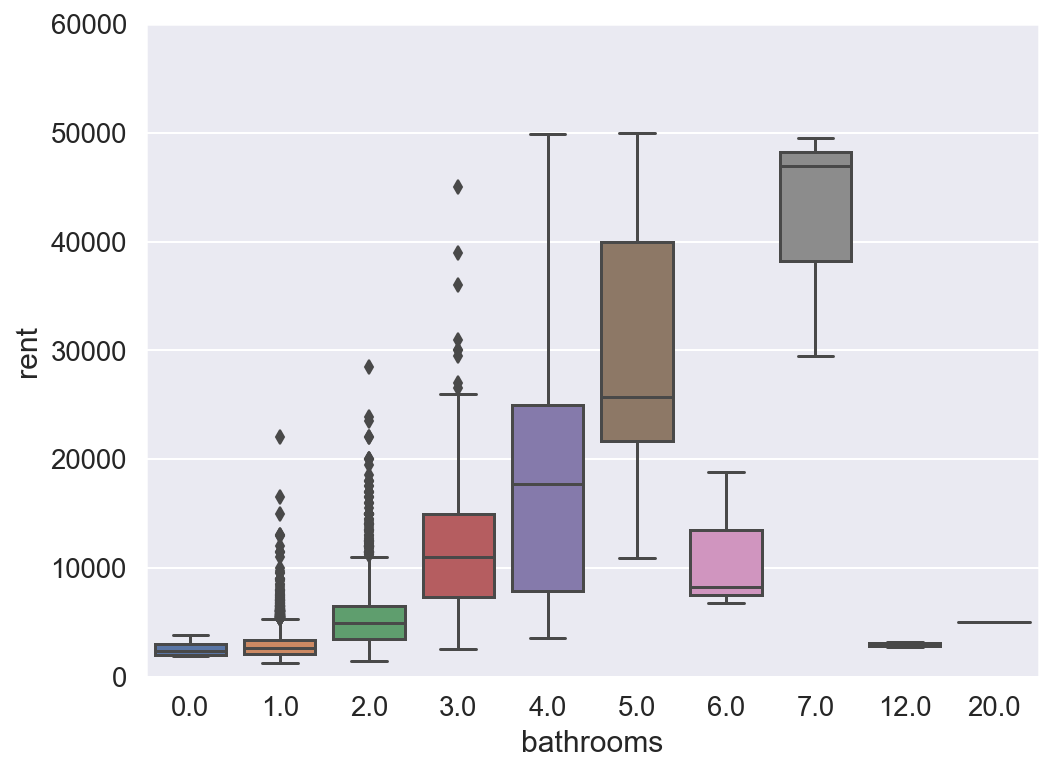

In [17]:
# bathrooms vs rent
var = 'bathrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

**Observations**

- bathrooms seems positively correlated with rent
- there seems to be outliers for bathrooms > 12 and equal to 6

Lets remove the outliers for better modeling performance

In [18]:
# remove bathroom outliers

train_df = train_df.drop(train_df[(train_df['bathrooms']>=12) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bathrooms']==6) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)


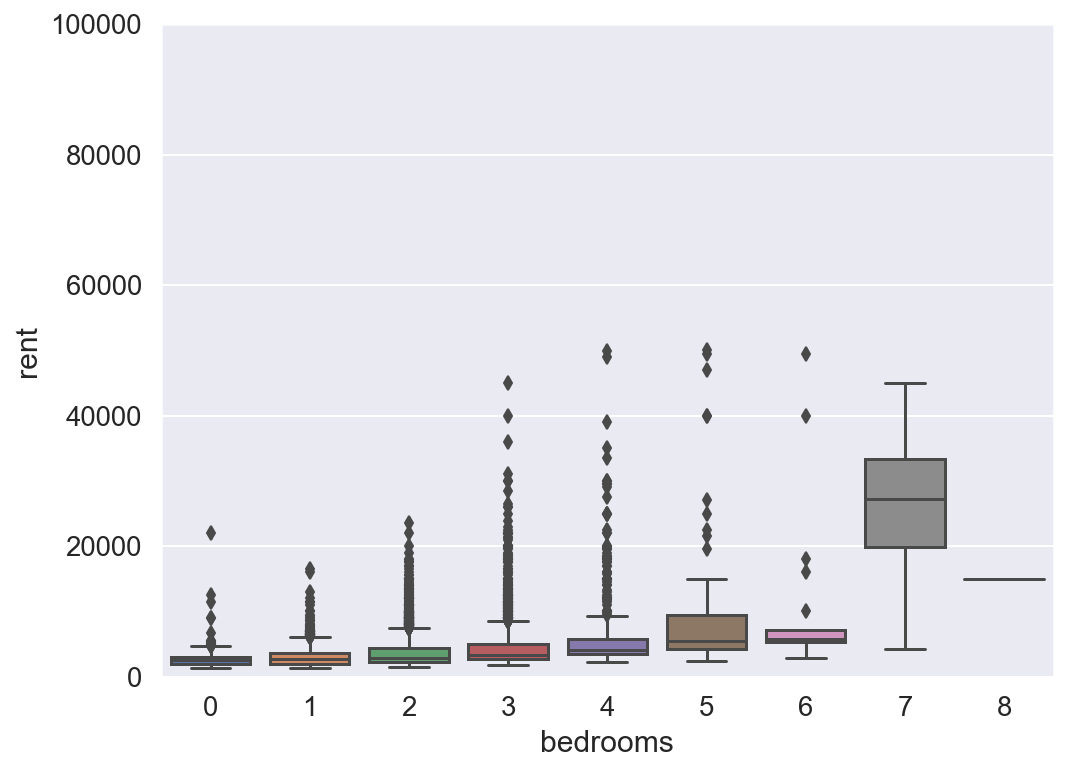

In [19]:
# bedrooms vs rent
var = 'bedrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

**Observations**

- bathrooms is postively correlated with rent
- outiers present with bathrooms = 8
- We might need to remove bathrooms = 6 as it seems like a outlier, we'll deal with later

Lets remove the outliers for better modeling performance


In [20]:
# remove bedroom outliers
train_df = train_df.drop(train_df[(train_df['bedrooms']>=8) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)


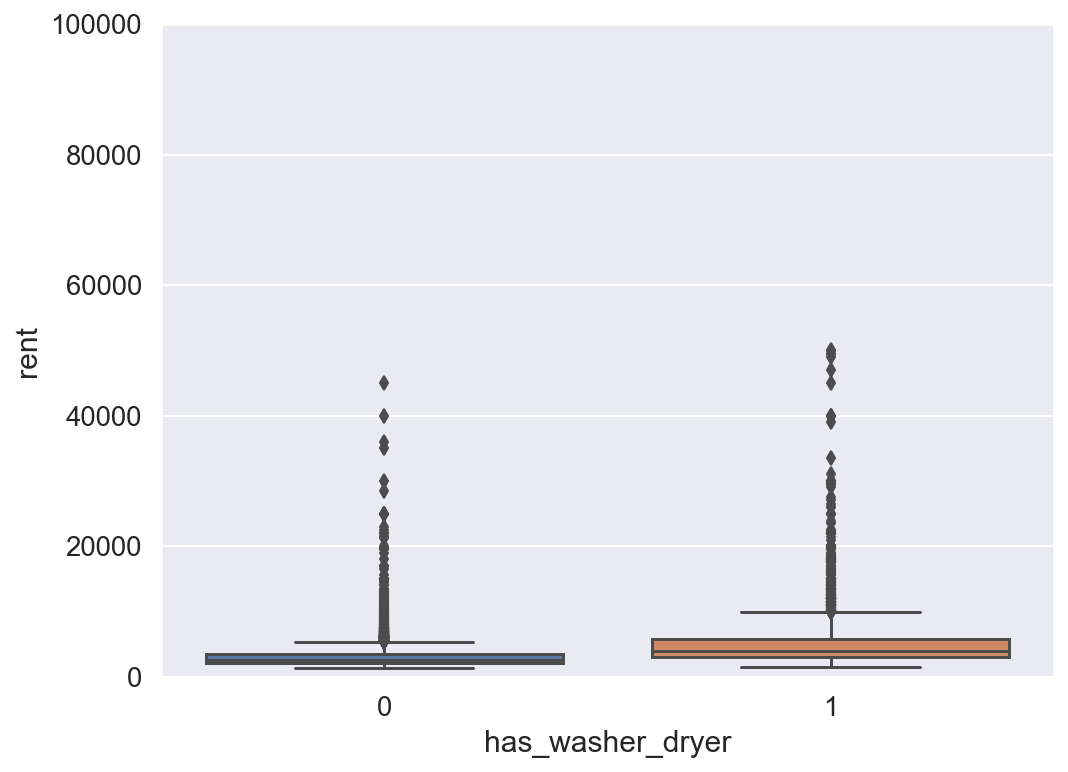

In [21]:
# has_washer_dryer vs rent
var = 'has_washer_dryer'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

**Observations**

- seems like listings with washer/dryers fetch a higher average price

Nothing to be removed here

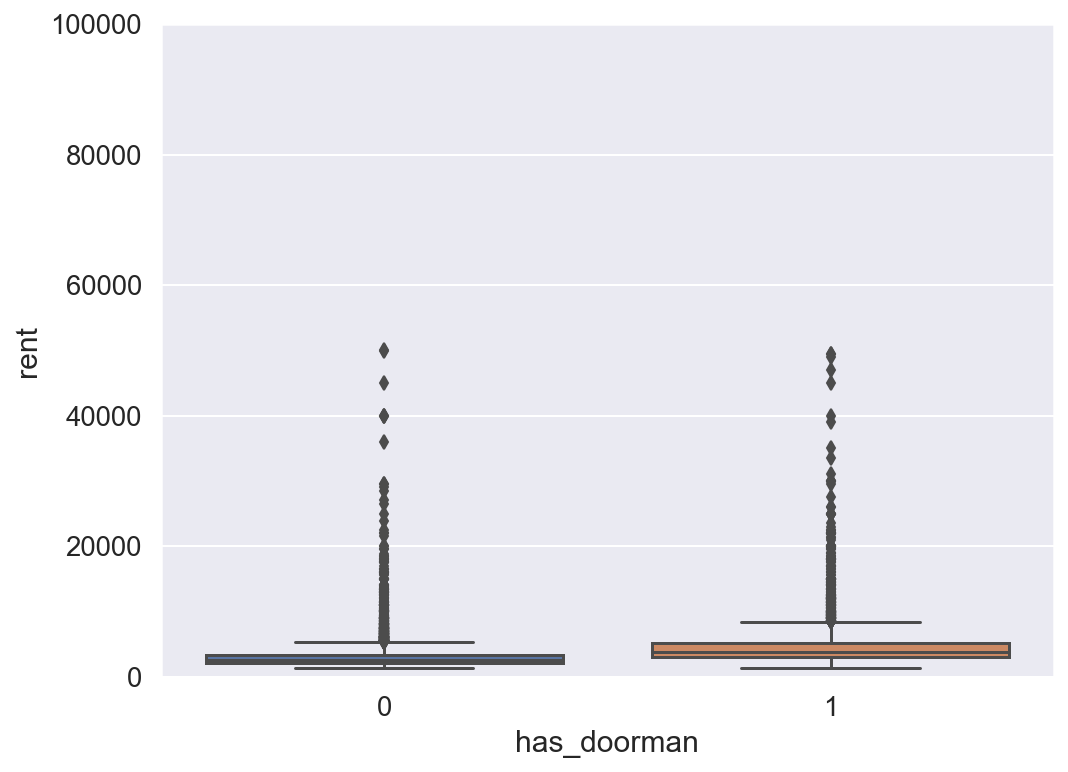

In [22]:
# has_doorman vs rent

var = 'has_doorman'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

**Observations**

- Again, seems like listings with doormen fetch higher avg prices.

Nothing to removed here

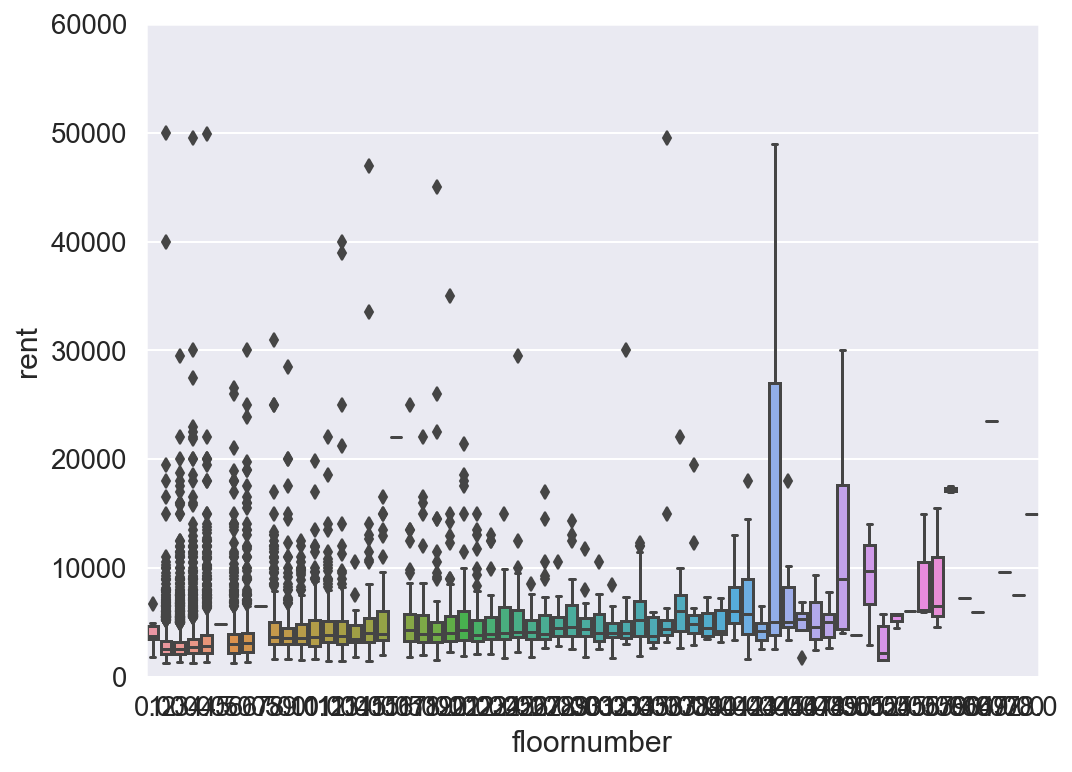

In [23]:
# floornumber vs rent

var = 'floornumber'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

**Observations** 

- floornumbers seem relatively scattered
- Suggest higher floornumbers fetch slightly higher prices

Hard to tell if there are outliers as tall buildings in bad neighborhoods arent necessarily going for higher prices 
Further testing needed, but for now we wont remove them

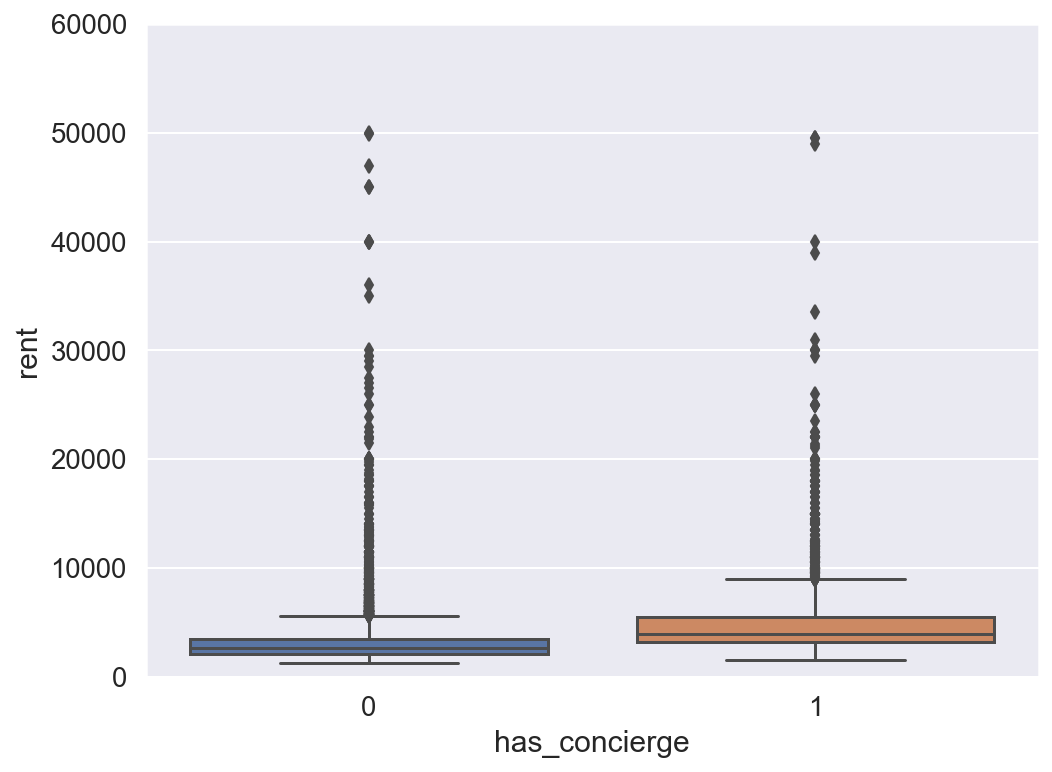

In [24]:
# has_concierge vs rent

var = 'has_concierge'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


**Observations**

- Looks like listings with a concierge fetch higher prices

Nothing surprising here and nothing to remove


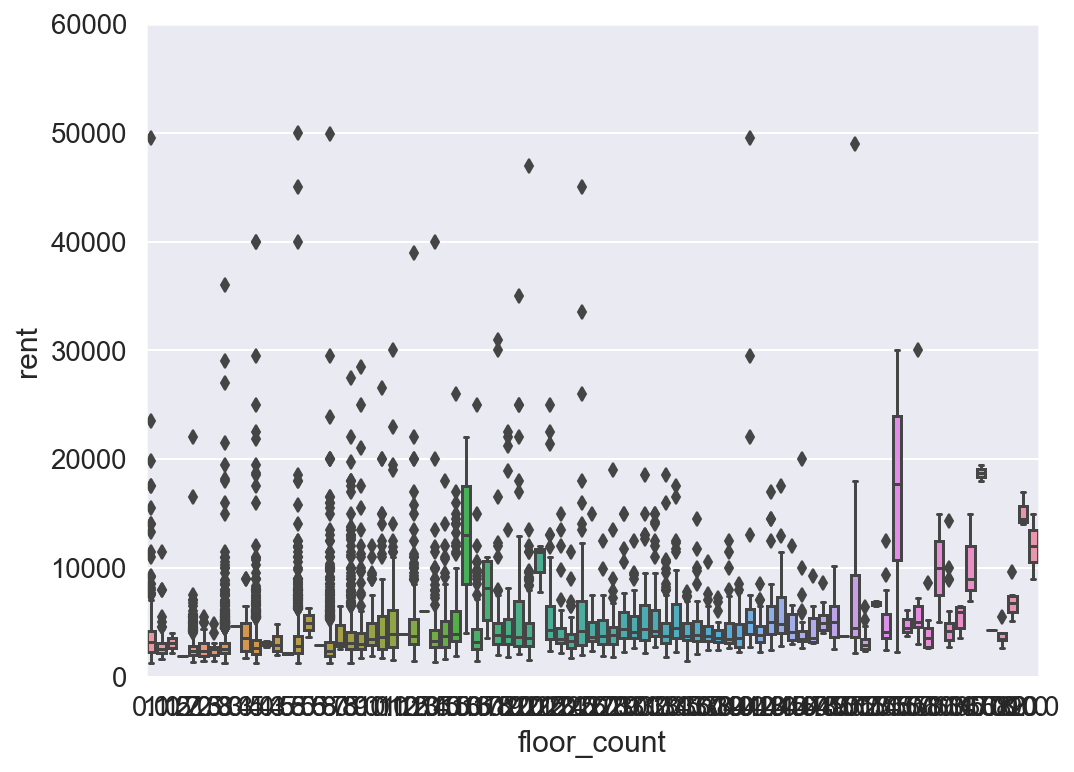

In [25]:
# floor_count vs rent

var = 'floor_count'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


**Observations**

- seems like there is a slight increase in rent as floor_count increases, but very minimal/ hard to tell
- potential outlier towards higher floor_count

Same as floornumber, as some listings with higher floor_count fetch lower prices but could be because a high building
in a bad neighborhood is not going to fetch a higher price

Further tested need, but for now we will leave it.

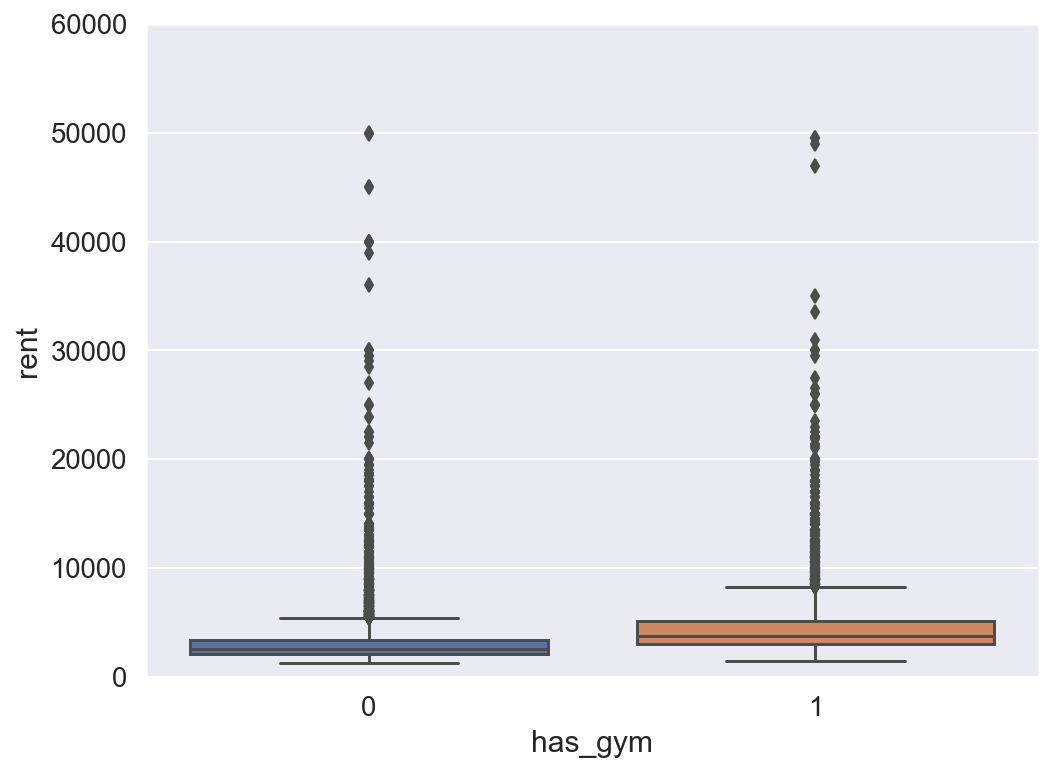

In [26]:
# has_gym vs rent

var = 'has_gym'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

**Observations**

- listings with a gym go for higher prices 

Nothing suprising here as listings with a gym have higher average prices, potential outliers could exist 
as listings with no gym have prices larger than those with a gym. 

For now we leave it

borough
Manhattan        4684.833114
Brooklyn         2969.863014
Queens           2288.977723
Staten Island    2187.692308
Bronx            2162.748634
Name: rent, dtype: float64


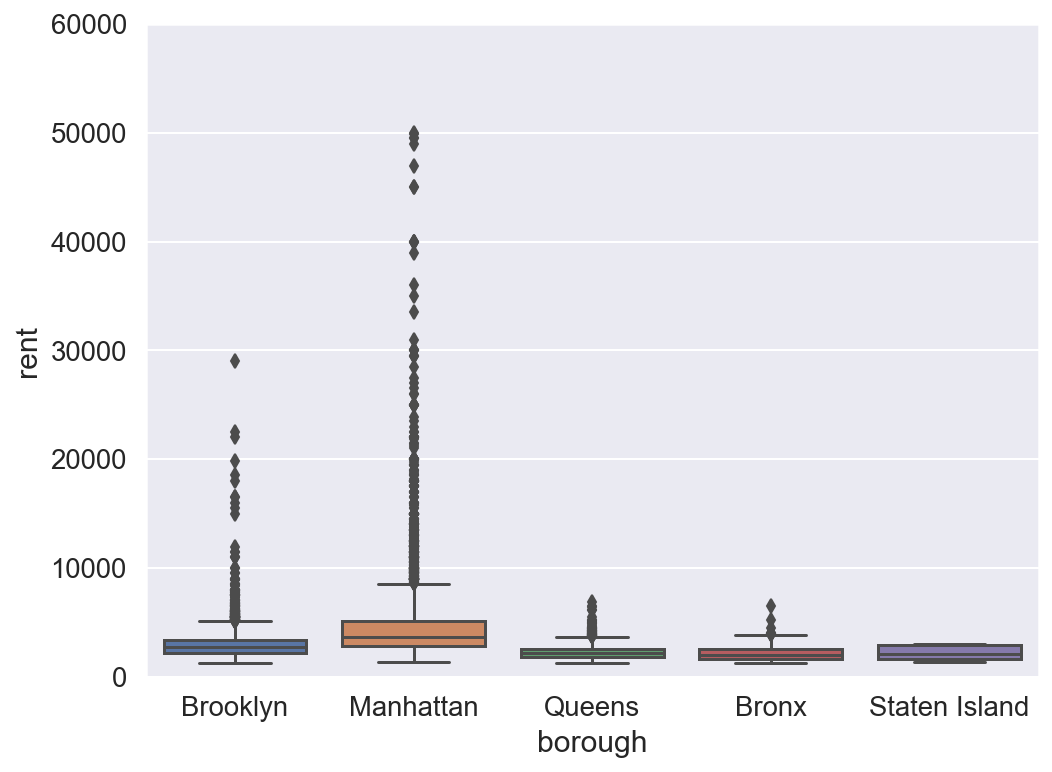

In [27]:
# borough vs rent
var = 'borough'

print(train_df.groupby(var)['rent'].mean().sort_values(ascending=False))

data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);



**Observations**

- Looks like most of listings are in Manhattan and Brooklyn
- Those two seem like the most expensive borough 
- from mean of rent per borough seems to suggest so

Doesnt seem like outliers are present, will need to encode borough in order to be able to put it through regressor
We'll save this for later

addr_zip
10461    1350.000000
11421    1414.000000
10452    1423.333333
10469    1450.000000
10460    1450.000000
            ...     
10065    6951.625000
10012    7086.284314
10282    7540.944444
10007    7621.400000
10013    9991.008403
Name: rent, Length: 149, dtype: float64


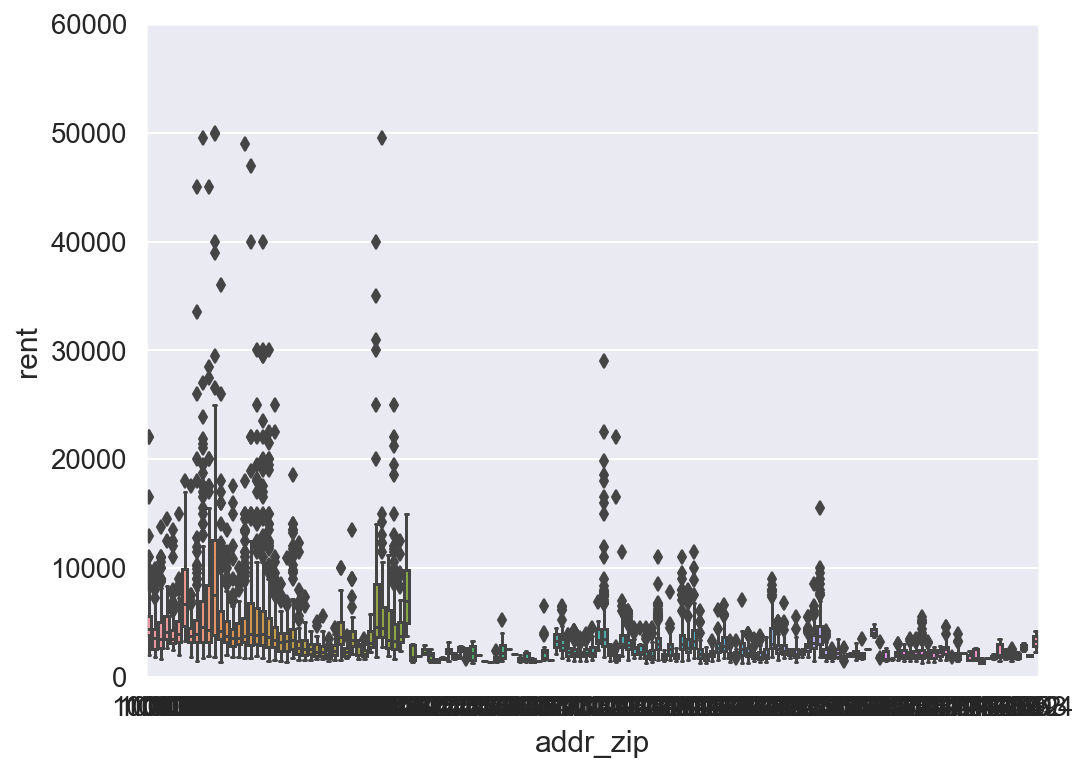

In [28]:
# zipcodes vs rent
var = 'addr_zip'
zip_group = train_df.groupby(var)['rent'].mean().sort_values()
print(zip_group)

data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

**Observations**

- most of the listings seem to be in lower value zipcodes, i think ther are mostly in manhattan and brooklyn
- hard to see a correlations between this and rent in terms of higher zipcode values
- certain zipcodes do fetch higher avg rent prices

From the graphs and statistics of avg rent per zipcode we see there prices do vary depending on zipcode. There is
a hierarchy in terms of zip code avg rent prices. This will need to be encoded in order to put in regressor. 

We will encode the addr_zip from out groups from lowest to highest avg rent prices.

*example*

encoded(addr_zip) = 0 *lowest*
encoded(addr_zip) = len(addr_zip) *highest*

neighborhood
Pelham Bay           1350.000000
Bedford Park         1360.000000
Van Nest             1400.000000
Highbridge           1423.333333
Laconia              1450.000000
                        ...     
Flatiron             6128.088050
Chinatown            6267.428571
Greenwich Village    6645.244898
Soho                 9321.645570
Tribeca              9591.939655
Name: rent, Length: 146, dtype: float64


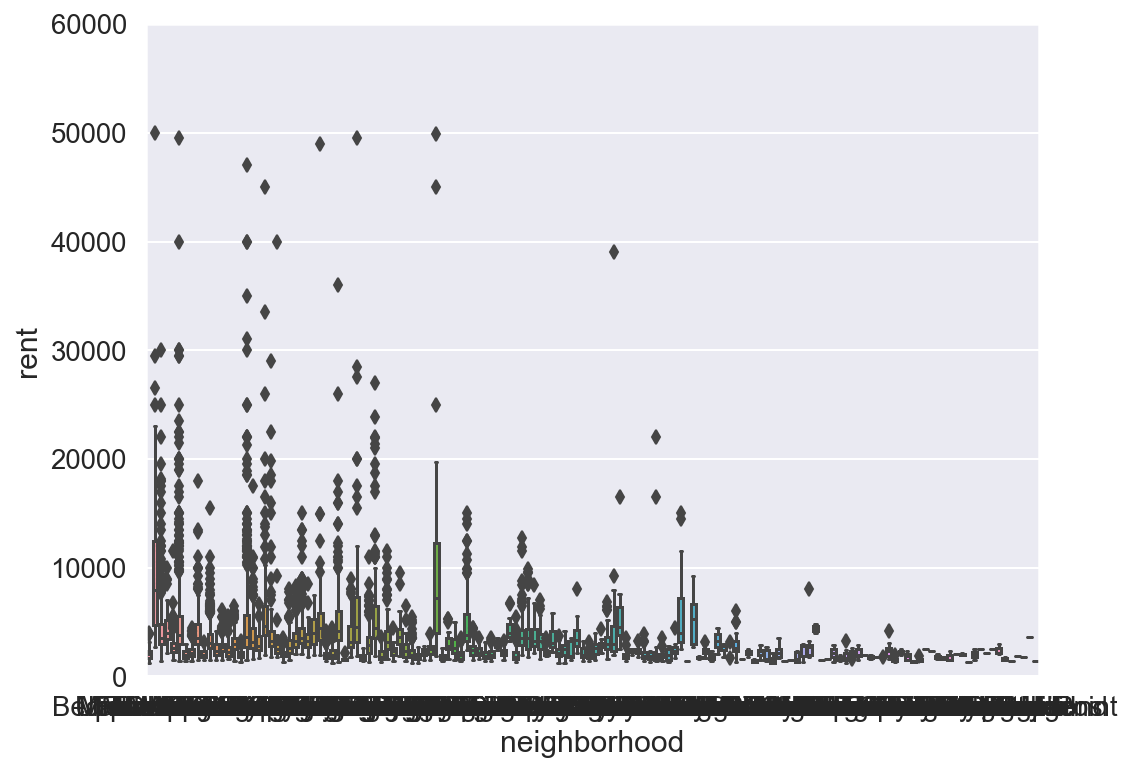

In [29]:
# neighbrhood vs rent
var = 'neighborhood'
neighborhood_group = train_df.groupby(var)['rent'].mean().sort_values()
print(neighborhood_group)

data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);



**Observations**

- Similar to addr_zip, most listings seem to be concentrated in certain neighbohoods
- Certain neighborhoods fetch higher prices

We will take the same approach as addr_zip and encode neighborhoods to put in a regressor

We will encode them in the same way... based on our grouping we give the 'cheapest' neighborhood a lower
encoded values than more expensive neighborhoods

*example*

encoded(neighborhood) = 0 *lowest*
encoded(neighborhood) = len(neighborhood) *highest*

## **Imputation and addressing missing values**

We will look for missing values and values that arent NaN but seem 'missing' in the sense that they dont make sense.
Like 0 bathrooms as, to my knowledge, all apartments have a bathroom.

We will first combine the train and test sets and apply the same impuations to each, we are combining them as they will both
serve as training data for submission 1.

In [30]:
# Combine Datasets

ntrain_df = train_df.shape[0]
ntest_df = test_df.shape[0]
target_train = train_df.rent.values
target_test = test_df.rent.values
all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data_df.drop(['rent'], axis=1, inplace=True)
print(f"Train data size is : {train_df.shape}")
print(f"Test data size is : {test_df.shape}")
print(f"Combined dataset size is : {all_data_df.shape}")


Train data size is : (11990, 35)
Test data size is : (2000, 35)
Combined dataset size is : (13990, 34)


### **Adding NaN's to values that dont make sense

- make listings with size_sqft = 0 into NaN as its not possible to exist without size
- make listings with bathrooms = 0 into NaN as all apartments have bathrooms, could be due to error in observation
- make listings with bedrooms = 0 into NaN as most of these listings i suspect are studies and dont technically have
    private bedrooms but are technically bedrooms so we will count them as so.
    


In [31]:
# size_sqft = 0 to nan

all_data_df.loc[all_data_df['size_sqft']==0,'size_sqft'] = np.nan

In [32]:
# bathrooms = 0 to nan
all_data_df.loc[all_data_df['bathrooms']==0,'bathrooms'] = np.nan

In [33]:
# bedrooms = 0 to nan
all_data_df.loc[all_data_df['bedrooms']==0,'bedrooms'] = np.nan

### Lets visually see what missing in out dataset

In [34]:
# Find NaN Ratio of Dataset

all_data_na = (all_data_df.isnull().sum() / len(all_data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
line,29.492495
bedrooms,13.002144
floornumber,10.707648
size_sqft,7.255182
year_built,3.352395
min_to_subway,1.022159
unit,0.800572
addr_unit,0.771980
bathrooms,0.050036
neighborhood,0.021444


Text(0.5, 1.0, 'Percent missing data by feature')

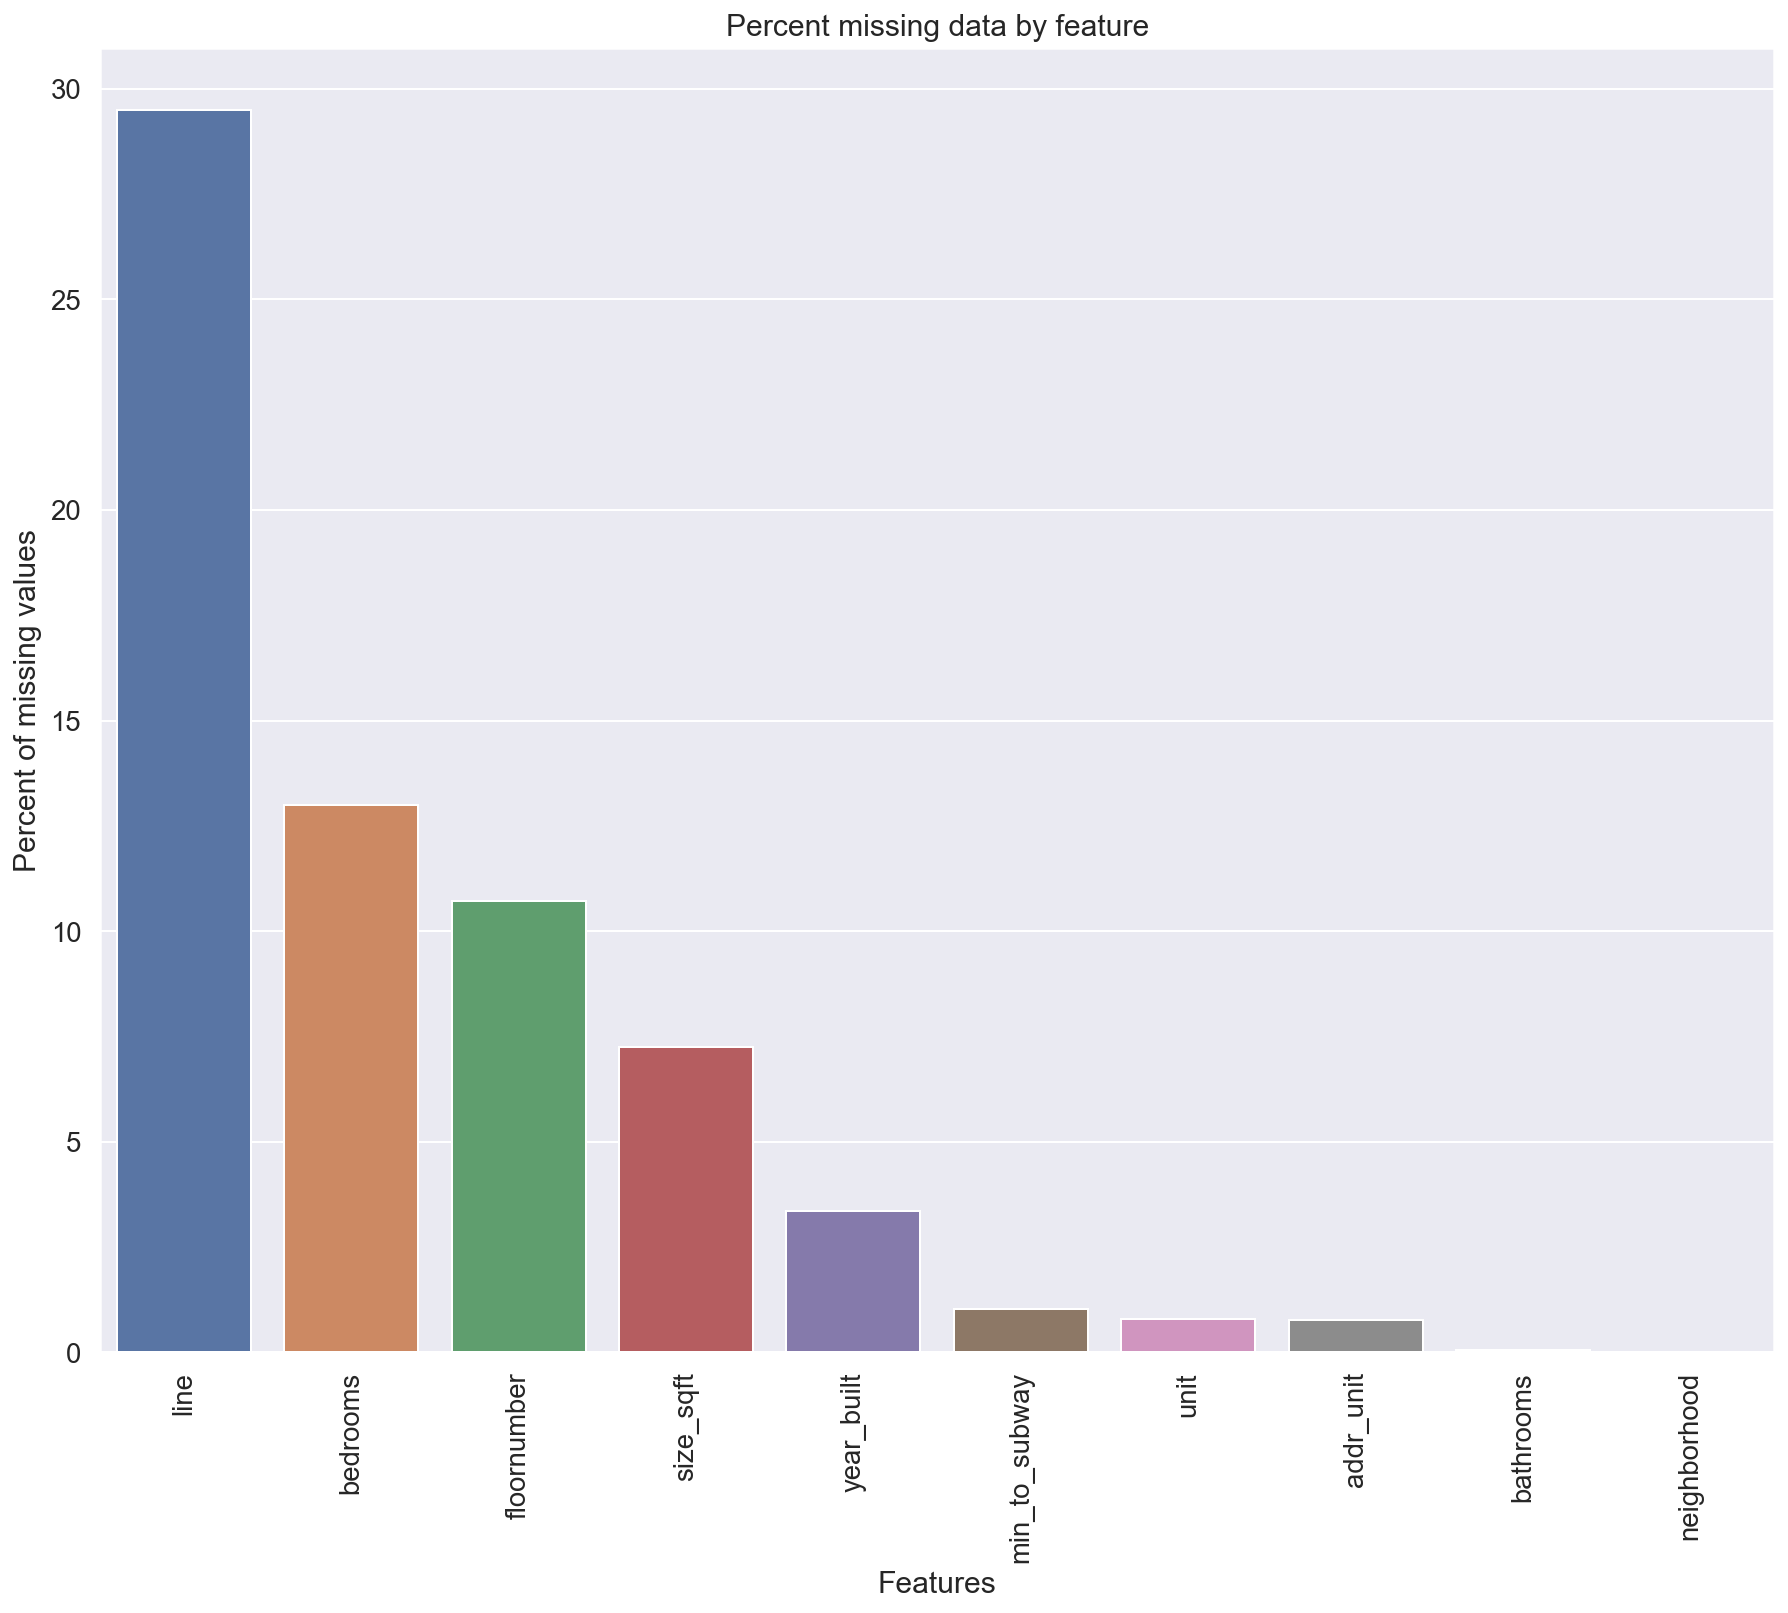

In [35]:
# Percent missing data by feature

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Lets impute values baded on avg for numeric data and mode for categorical data**

**Every missing column will be imputed with avg composed from groupby objects that seem most appropriate**

- we will impute 'line' from other listings close to it, i.e zip code, and the most occuring value
- impute bedrooms by filling all bedrooms that were 0 to 1
- impute floornumber with avg floor number value in column and round to nearest integer
- impute size_sqft with avg value for other listings with same bedroom size as those generally account for how big an apartment is.
- impute year_built by the avg year_built of listings in same zipcode 
- impute min_to_subway by avg time to subway of other listings in the same zipcode
- impute unit will most occuring units in unit column
- impute addr_unit same as unit
- impute bathrooms that were originally 0 with 1 as most places *usually* have 1 bathrooms
- impute missing neighborhood with most occuring neighborhood in listing zip code


In [36]:
# impute missing line values using zipcode and most frequent line in that area
all_data_df['line'] = all_data_df.groupby('addr_zip')['line'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))

#impute missing bedroom values with 1 as they were all 0 before 
all_data_df['bedrooms'].fillna(1,inplace=True)

#impute floornumber missing values with mean floornumber
all_data_df['floornumber'].fillna(all_data_df['floornumber'].mean(),inplace=True)
all_data_df['floornumber'] = all_data_df['floornumber'].round(0).astype(int)

#impute size_sqft missing values with mean size of # of bedrooms
all_data_df['size_sqft'] = all_data_df.groupby('bedrooms')['size_sqft'].transform(lambda x: x.fillna(x.mean()))

#impute year_built missing values with year_built mean of addr_zipcode
all_data_df['year_built'] = all_data_df.groupby('addr_zip')['year_built'].transform(lambda x: x.fillna(x.mean()))

#impute min_to_subway missing values with mean of addr_zipcode
all_data_df['min_to_subway'] = all_data_df.groupby('addr_zip')['min_to_subway'].transform(lambda x: x.fillna(x.mean()))

#left over missing data for min_to_subway, looked online to impute
all_data_df.loc[all_data_df['min_to_subway'].isnull(),'min_to_subway'] = 7  

#impute unit missing values with column mean
all_data_df['unit'].fillna(all_data_df['unit'].mode()[0],inplace=True)

#impute addr_unit missing values with column mean
all_data_df['addr_unit'].fillna(all_data_df['addr_unit'].mode()[0],inplace=True)

#impute bathrooms missing values with 1 as they were 0 before
all_data_df['bathrooms'].fillna(1,inplace=True)

#impute neighborhood missing values with addr_zip mode
all_data_df['neighborhood'] = all_data_df.groupby('addr_zip')['neighborhood'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))



Quick check if there are anymore missing values

In [37]:
#Check if there are any missing values left

all_data_na = (all_data_df.isnull().sum() / len(all_data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## **Feature engineering/ transformation**

We will encode some categorical features that we feel usually indicate how expensive a home will be in the city

Based on personal intuition and suggestions from the data, rent is dependant on borough and Manhattan is known as one of the most expensive places to live.

Same goes for addr_zip and neighborhood as certin neighborhoods are known to be more expensive than others and a group of zip codes tend to represent a neighborhood. This is also suggested in the data.

In [38]:
# feature transoforming borough

print(all_data_df['borough'].describe())

print(train_df.groupby(var)['rent'].mean().sort_values(ascending=False))

borough_rank_dic = {"Staten Island": 0,
                   "Bronx":1,
                   "Queens":2,
                   "Brooklyn":3,
                   "Manhattan":4}

all_data_df.groupby('borough').count()

all_data_df['borough_encoded'] = all_data_df['borough'].map(borough_rank_dic)



count         13990
unique            5
top       Manhattan
freq           6209
Name: borough, dtype: object
neighborhood
Tribeca              9591.939655
Soho                 9321.645570
Greenwich Village    6645.244898
Chinatown            6267.428571
Flatiron             6128.088050
                        ...     
Laconia              1450.000000
Highbridge           1423.333333
Van Nest             1400.000000
Bedford Park         1360.000000
Pelham Bay           1350.000000
Name: rent, Length: 146, dtype: float64


In [39]:
# feature transforming addr zip

print(zip_group)

# dictionary for zip_group
zip_group_dic = zip_group.to_dict()

# dictionary with encoded values for zip codes from least to greatest
addr_zip_rank_dic = {key:val for key,val in zip(list(zip_group_dic.keys()),np.arange(0,len(zip_group_dic),1))}

all_data_df['addr_zip_encoded'] = all_data_df['addr_zip'].map(addr_zip_rank_dic)


addr_zip
10461    1350.000000
11421    1414.000000
10452    1423.333333
10469    1450.000000
10460    1450.000000
            ...     
10065    6951.625000
10012    7086.284314
10282    7540.944444
10007    7621.400000
10013    9991.008403
Name: rent, Length: 149, dtype: float64


In [40]:
# feature transforming neighborhoods

print(all_data_df['neighborhood'].describe())

# encode neighborhoods based on their avg values

neighborhood_group_dic = neighborhood_group.to_dict()

# dictionary with encoded values for neighborhoods from least to greatest
neighborhood_rank_dic = {key:val for key,val in zip(list(neighborhood_group_dic.keys()),np.arange(0,
                                                                                                  len(neighborhood_group_dic),
                                                                                                  1))}

all_data_df['neighborhood_encoded'] = all_data_df['neighborhood'].map(neighborhood_rank_dic)


count       13990
unique        151
top       Astoria
freq         1005
Name: neighborhood, dtype: object


## **Target variable transformation**

Our target 'rent' was not really normal and had a high skewness and kurtosis so we will try and see if transforming with using log(1+x) will help make the data more normal... we will use this later to see if it was any effect


 mu = 8.04 and sigma = 0.48



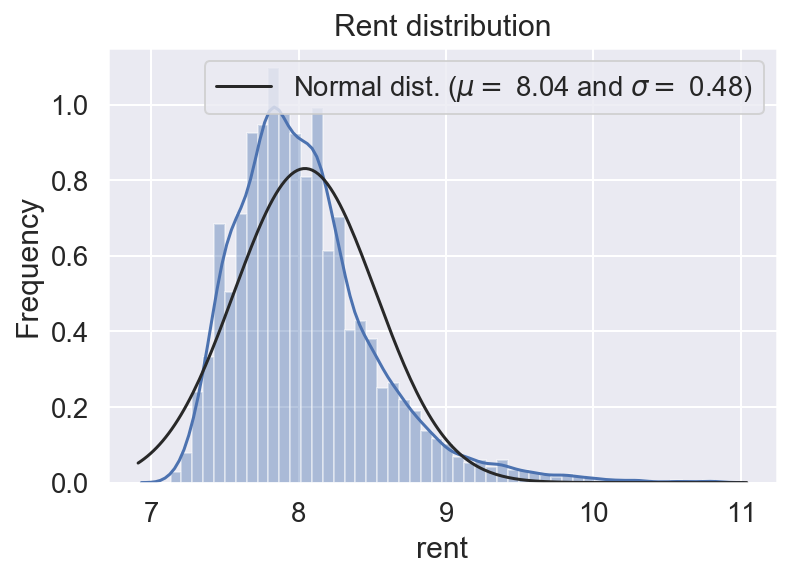

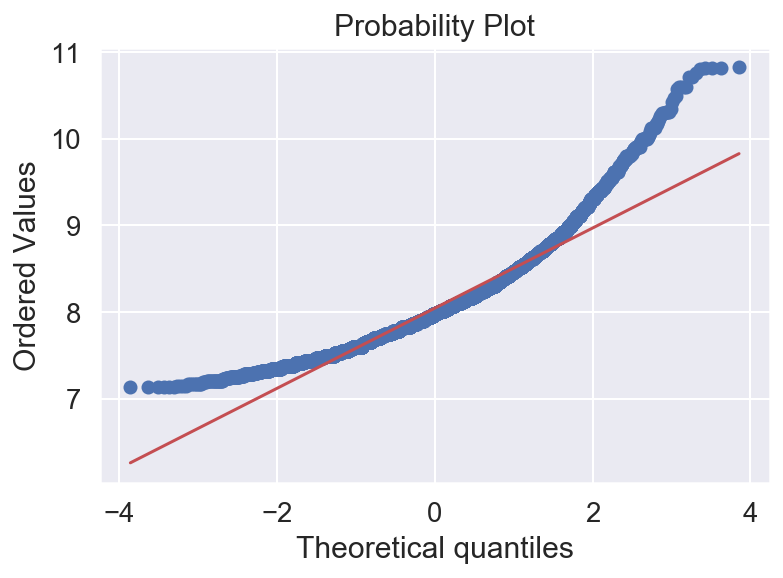

Skewness: 1.2654881051360927
Kurtosis: 2.809924763575284


In [41]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["rent"] = np.log1p(train_df["rent"])

#Check the new distribution 
sns.distplot(train_df['rent'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['rent'])
print( f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent distribution')

fig = plt.figure()
res = stats.probplot(train_df['rent'], plot=plt)
plt.show()

print(f"Skewness: {train_df['rent'].skew()}")
print(f"Kurtosis: {train_df['rent'].kurt()}")

## **Modeling**

first we will split all_data into the oringal train and test sizes... there will be some bias as the test set did have *some* values but we are mostly interested in test2

In [42]:
# split train and test sets

train = all_data_df[:ntrain_df]
test = all_data_df[ntrain_df:]

train.head()

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,addr_lon,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
0,#22A,551248,4.0,3.0,1300.0,645 OCEAN AVENUE,Brooklyn,11226,40.646982,-73.960065,...,0,1,Flatbush,Brooklyn,22A,6,B,3,68.0,54.0
1,#406,3373,1.0,1.0,475.0,93 WORTH STREET,New York,10013,40.716599,-74.004799,...,0,0,Tribeca,Manhattan,406,4,06,4,148.0,145.0
2,#18A,70747,3.0,3.0,1886.0,305 EAST 51 STREET,New York,10022,40.755402,-73.967598,...,0,0,Midtown East,Manhattan,18A,18,A,4,141.0,127.0
3,#23E,42076,1.0,1.0,827.0,70 WEST 37TH STREET,New York,10018,40.751301,-73.986298,...,0,1,Midtown South,Manhattan,23E,23,E,4,124.0,129.0
4,#3B,319156,3.0,1.0,1200.0,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,-73.944678,...,0,1,Bedford-Stuyvesant,Brooklyn,3B,3,B,3,98.0,96.0


In [43]:
test.head()

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,addr_lon,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
11990,#1B,18724,1.0,1.0,550.0,167 MOTT STREET,New York,10013,40.719799,-73.996399,...,0,1,Little Italy,Manhattan,1B,1,B,4,148.0,130.0
11991,#C4,403900,1.0,1.0,750.0,107 LINDEN STREET,Brooklyn,11221,40.693118,-73.920035,...,0,1,Bushwick,Brooklyn,C4,4,C,3,93.0,97.0
11992,#GARDEN,18175264,2.0,1.0,800.0,47 CARROLL STREET,Brooklyn,11231,40.683399,-74.003998,...,0,0,Columbia St Waterfront District,Brooklyn,GARDEN,6,A,3,112.0,123.0
11993,#2C,104863,2.0,2.0,1300.0,952 COLUMBUS AVENUE,New York,10025,40.799900,-73.962799,...,0,1,Upper West Side,Manhattan,2C,2,C,4,120.0,133.0
11994,#9,95125,2.0,1.0,750.0,424 EAST 116 STREET,New York,10029,40.795350,-73.934597,...,0,0,East Harlem,Manhattan,9,6,A,4,99.0,88.0


## Creating Models

We will use a linear regressor and a randomforestregressor as the main choices for this round.
We are selecting features based on those *most* correlated with 'rent' from previous analysis and those we encoded.


In [45]:
# linear model

features = ['bedrooms','size_sqft','bathrooms','has_washer_dryer','has_doorman','floornumber',
            'has_concierge','has_gym','borough_encoded','addr_zip_encoded',
            'neighborhood_encoded']

X_train = train[features]
X_test = test[features]

X_train = X_train.fillna(X_train.median(), axis=0)
X_test = X_test.fillna(X_test.median(), axis=0)

lr = LinearRegression()

lr.fit(X_train,target_train)

pred = lr.predict(X_test)

print(f'R2_Score:{lr.score(X_test,target_test)}')

print(f'mean_squared_error:{MSE(target_test,pred)}')




R2_Score:0.6381927375149627
mean_squared_error:2698056.3331958205


**Observations**

We can see that our R2 score (how accurate our model is) is decent and the MSE is ok, although the test set had some input in imputation for certain features.

We can see below the coefficient values for the feature variables and see the weights associated with them.
Interestingly, bedrooms has a negative coeficient value.

In [46]:
lr.coef_

array([-346.32233637,    4.07013914, 1268.13448104,  123.22127447,
        263.47204177,   26.49440893,  246.80107284,  167.0042663 ,
        253.35160404,   13.45432136,    5.2363734 ])

### **Random Forest Regressor**

We will create a random forest regressor and see how it compares to the linear model

In [48]:
# random forest ensemble 

rf = RandomForestRegressor()

rf.fit(X_train,target_train)
pred_rf = rf.predict(X_test)

print(rf.score(X_test,target_test))

print(MSE(target_test,pred_rf))


0.7765865361855563
1666030.9879509497


We can see that a the ensemble method performed substantially better than the linear regressor...
Seems like this is our model of choice for now and we need to tune parameters

## **Hyperparameter Tuning**

We need to tune the random forest regressor in order to see some more improvement in accuracy and MSE scores.

We will begin by using a randomized search over a wide range of values to narrow down the best values to use in a grid search.

We use this approach because grid searching is computationally expensive and we will limit the number of combinations we will search with.

In [49]:
# random search hyper parameter tuning for random forest regressor before using grid search

from sklearn.model_selection import RandomizedSearchCV

# number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 10,stop = 50,num = 10)]

# maximum depth of each tree
max_depth = [int(x) for x in np.linspace(start=10,stop=110, num=11)]
max_depth.append(None)

# min number of samples required to split on a node
min_samples_split = [2,5,10]

# min number of samples per leaf before a split can occur
min_samples_leaf = [1,2,4]

# number of features to consider when splitting
max_features = ['auto','sqrt']

# if bootstrap sampling is used to train
bootstrap = [True,False]

randomf_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'bootstrap':bootstrap
               }



In [50]:
#intialize estimator
rfr = RandomForestRegressor()

rf_search = RandomizedSearchCV(estimator = rfr,param_distributions = randomf_grid,
                               n_iter=200,n_jobs = -1,cv=3,verbose=2,random_state=42)

# fit model
rf_search.fit(X_train,target_train)




Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


**Results**

We see below the best params and a table of the estimators sorted by rank and their params
Using this table we will narrow the grid search params to only the best.

In [51]:
# best parameters of the best estimator

rf_search.best_params_

{'n_estimators': 41,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [52]:
# predict using the best estimator
pred_rrf = rf_search.predict(X_test)



In [53]:
# the best score of any estimator
rf_search.best_score_

0.8676023295425279

In [54]:
# R2 score for the randomized search regressor

rf_search.score(X_test,target_test)

0.7873142095717992

In [55]:
# dataframe of best values

rf_search_results = pd.DataFrame(rf_search.cv_results_).sort_values(by='rank_test_score')
rf_search_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,0.734202,0.022091,0.046864,1.275552e-02,41,5,1,sqrt,70,False,"{'n_estimators': 41, 'min_samples_split': 5, '...",0.861900,0.867241,0.873668,0.867602,0.004811,1
72,0.494675,0.007364,0.041658,7.364684e-03,45,5,2,sqrt,60,True,"{'n_estimators': 45, 'min_samples_split': 5, '...",0.861330,0.864477,0.875321,0.867042,0.005993,2
163,0.564214,0.015938,0.039948,5.648127e-03,36,5,1,sqrt,60,True,"{'n_estimators': 36, 'min_samples_split': 5, '...",0.866231,0.862893,0.866005,0.865043,0.001523,3
143,0.354190,0.004983,0.023969,5.150430e-07,23,5,2,sqrt,60,False,"{'n_estimators': 23, 'min_samples_split': 5, '...",0.866393,0.859415,0.869316,0.865041,0.004154,4
20,0.629608,0.004628,0.041657,7.362717e-03,45,10,1,sqrt,30,False,"{'n_estimators': 45, 'min_samples_split': 10, ...",0.862373,0.864063,0.867585,0.864673,0.002171,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.326227,0.014946,0.034623,1.883852e-03,27,2,1,auto,20,False,"{'n_estimators': 27, 'min_samples_split': 2, '...",0.763384,0.724186,0.772622,0.753396,0.020997,196
26,1.835297,0.014729,0.041657,7.362998e-03,36,2,1,auto,40,False,"{'n_estimators': 36, 'min_samples_split': 2, '...",0.762834,0.721917,0.773785,0.752844,0.022322,197
135,1.182419,0.016946,0.030628,1.883908e-03,27,2,2,auto,90,False,"{'n_estimators': 27, 'min_samples_split': 2, '...",0.769753,0.716009,0.767572,0.751110,0.024838,198
8,1.379488,0.029597,0.037285,1.881718e-03,27,2,1,auto,50,False,"{'n_estimators': 27, 'min_samples_split': 2, '...",0.760524,0.715968,0.775319,0.750602,0.025225,199


In [56]:
# better view of parameters

pd.set_option('display.max_colwidth', -1)
rf_search_results['params'].head(10)

21     {'n_estimators': 41, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False} 
72     {'n_estimators': 45, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}  
163    {'n_estimators': 36, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}  
143    {'n_estimators': 23, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False} 
20     {'n_estimators': 45, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
31     {'n_estimators': 23, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False} 
24     {'n_estimators': 36, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False} 
181    {'n_estimators': 36, 'min_samples_

**Observations**

The random search helped narrow down parameters to explore further
The R2 error didnt improve much which is suggesting a ceiling to the improvemnt of the model
In order to improve the model we may need to impute using better values/intuitions and testing with other features.

In [57]:
# grid search to find the optimal hyper parameterss
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[20,30,40,50],
               'max_depth':[70,80,90,100,110],
               'min_samples_split':[5,10,12],
               'min_samples_leaf':[1,2],
               'max_features':[3,4,5,'auto'],
               'bootstrap':[False]
               }

rfr_gs = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfr_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,target_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False],
           

In [58]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [59]:
gs_results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score',ascending=False)
gs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
96,0.384817,0.050565,0.022638,0.001882,False,80,3,1,5,20,"{'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}",0.870077,0.865881,0.874798,0.870251,0.003642,1
0,0.362184,0.001884,0.026632,0.004981,False,70,3,1,5,20,"{'bootstrap': False, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}",0.867236,0.864461,0.878663,0.870119,0.006146,2
413,0.552595,0.004982,0.030625,0.001884,False,110,4,1,10,30,"{'bootstrap': False, 'max_depth': 110, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}",0.867688,0.866236,0.874620,0.869514,0.003658,3
134,0.837531,0.026239,0.042033,0.007640,False,80,4,2,5,40,"{'bootstrap': False, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}",0.866852,0.865409,0.876180,0.869480,0.004773,4
3,0.984017,0.035779,0.061253,0.010485,False,70,3,1,5,50,"{'bootstrap': False, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}",0.868604,0.866650,0.873181,0.869478,0.002737,5


In [60]:
best_est = grid_search.best_estimator_


best_pred = best_est.predict(X_test)

MSE(target_test,best_pred)

1670324.250165305

In [61]:
# transform target variable for better predictions

from sklearn.compose import TransformedTargetRegressor

rf_trans = TransformedTargetRegressor(regressor = best_est,func = np.log1p, inverse_func = np.expm1)
rf_trans.fit(X_train,target_train)
rf_trans_pred = rf_trans.predict(X_test)

MSE(target_test,rf_trans_pred)

1684917.8767811747

In [62]:
rf_trans.score(X_test,target_test)

0.7740538190363822

In [63]:
# import Submission data set


submission_df = pd.read_csv('Datasets/SE_rents2018_test2.csv')

submission_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7428577,#4F,159457,0,1.0,450.0,2018-08-01 08:10:01,162 SMITH STREET,Brooklyn,11201,...,0,0,NaN,0,"Large studio with high ceilings, plenty of natural light all day, central air and dog friendly! The last of the affordable studios left in Boerum Hill, centrally located near all the shops, restaurants, entertainment and transportation. On the 4th floor in a walk-up; so 3 flights. About 450 square feet. Smith Street is right on top of the F & G trains. This is one of few buildings that will take dogs! (Several excellent veterinarians in neighborhood.) Near glorious Brooklyn Bridge Park. No laundry in the building but there is a drop off across the street. CitiBike kiosks everywhere so you don't have to own hour own (or lug it upstairs). Available for move in before the 1st of Septmeber. Non-smoking building. My fee is only one month's rent.",Cobble Hill,Brooklyn,4F,4.0,F
1,7454944,NaN,1579540,2,1.0,950.0,2018-08-08 08:01:59,21-22 CLINTONVILLE STREET,Whitestone,11357,...,0,0,NaN,0,"Beautifully Renovated Second Floor Unit. Kitchen Updated With Granite And Stainless Appliances. Two Generously Sized Light Filled Bedrooms. Updated Bathroom With Skylight. Wood Floors Throughout. Three In Wall A/C's. Convenient To Shopping, Highways And Public Transportation. Qm2 To Nyc, Q16 & Q76 Nearby.",Whitestone,Queens,NaN,NaN,NaN
2,7473595,#1D,64873,1,1.0,0.0,2018-08-14 08:04:27,676 AMSTERDAM AVENUE,New York,10025,...,0,0,NaN,1,"MID SEPT MOVE-IN NO fee! $2895\r\nIf you are looking for a large 1 bed, non-cookie cutter type apt, this place is it!\r\n16ft ceilings with recessed lighting. The super is awesome and very tall, so he can probably help you replace the lightbulbs :) \r\nKING-SIZED BEDROOM. The living room is so big you can fit all of your family, friends pets and furniture. \r\nRenovated open kitchen with breakfast bar.\r\nPART-TIME DRM, LAUNDRY, ELEVATOR, BIKE ROOM. Steps to the express trains and Pinkberry :)",Upper West Side,Manhattan,1D,1.0,D
3,7490488,#5C,546541,2,1.0,500.0,2018-08-19 01:19:00,56 EAST 21 STREET,Brooklyn,11226,...,0,0,NaN,1,"Here at Kenmore Place, beautifully curated apartments display a striking color palette expertly incorporating light and dark. Floor-to-ceiling windows, recessed lighting, and wide plank wood flooring create an expansive atmosphere.\r\n\r\nContemporary kitchens feature high-end stainless steel appliances by Summit, floating cabinets with under-cabinet lighting, sleek midnight black backsplashes and wall tiling, and matte black fixtures. Soothing bathrooms capture the perfect balance of style and convenience. Modern fixtures include custom mirrors, bathtubs by Maax, Brizo shower heads, and chic wall-mounted vanities by Badeloft.\r\n\r\nResidences also offer the convenience of split units for A/C and heat, and video intercoms. This home boasts a balcony accessible from both bedrooms. 62 East 21st Street enjoys a thoughtfully curated amenity package, designed to enhance comfort and convenience, as well as reduce costs of a gym membership. A lounge and common roof deck offer aesthetically appealing settings for relaxation and entertainment. Additional amenities include a fitness center, common laundry room, and bike storage.\r\n\r\nFor all of your apartment needs, contact Matthew, as he has access to a variety of offerings and doesn't charge a broker's fee.",Flatbush,Brooklyn,5C,5.0,C
4,7460896,#11G,10678,1,1.0,610.0,2018-08-09 14:05:52,101 AVENUE D,New York,10009,...,1,0,NaN,1,"STUNNING ONE BEDROOM WITH PRIVATE BALCONY. Features include Condo-like Finishes, Abundant Storage, Open Kitchen, Top-of-the-line Stainless Steel Appliances, Bamboo Flooring, Over-Sized Windows and Caesarstone Countertops. The Arabella 101 is the Premier Boutique LUXURY rental building in the heart of the East Village with L

In [64]:
# drop unecessary columns 
submission_df.drop(["rent","created_at",'description','bin'],axis=1,inplace=True)

In [65]:
# size_sqft = 0 to nan

submission_df.loc[submission_df['size_sqft']==0,'size_sqft'] = np.nan

In [66]:
# bathrooms = 0 to nan
submission_df.loc[submission_df['bathrooms']==0,'bathrooms'] = np.nan

In [67]:
# bedrooms = 0 to nan
submission_df.loc[submission_df['bedrooms']==0,'bedrooms'] = np.nan

In [68]:
# Find NaN Ratio of Dataset

submission_na = (submission_df.isnull().sum() / len(submission_df)) * 100
submission_na = submission_na.drop(submission_na[submission_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':submission_na})
missing_data

,Missing Ratio
line,30.60
floornumber,13.15
bedrooms,12.65
size_sqft,8.85
year_built,4.10
unit,1.45
addr_unit,1.45
min_to_subway,0.80
neighborhood,0.05
bathrooms,0.05


Text(0.5, 1.0, 'Percent missing data by feature')

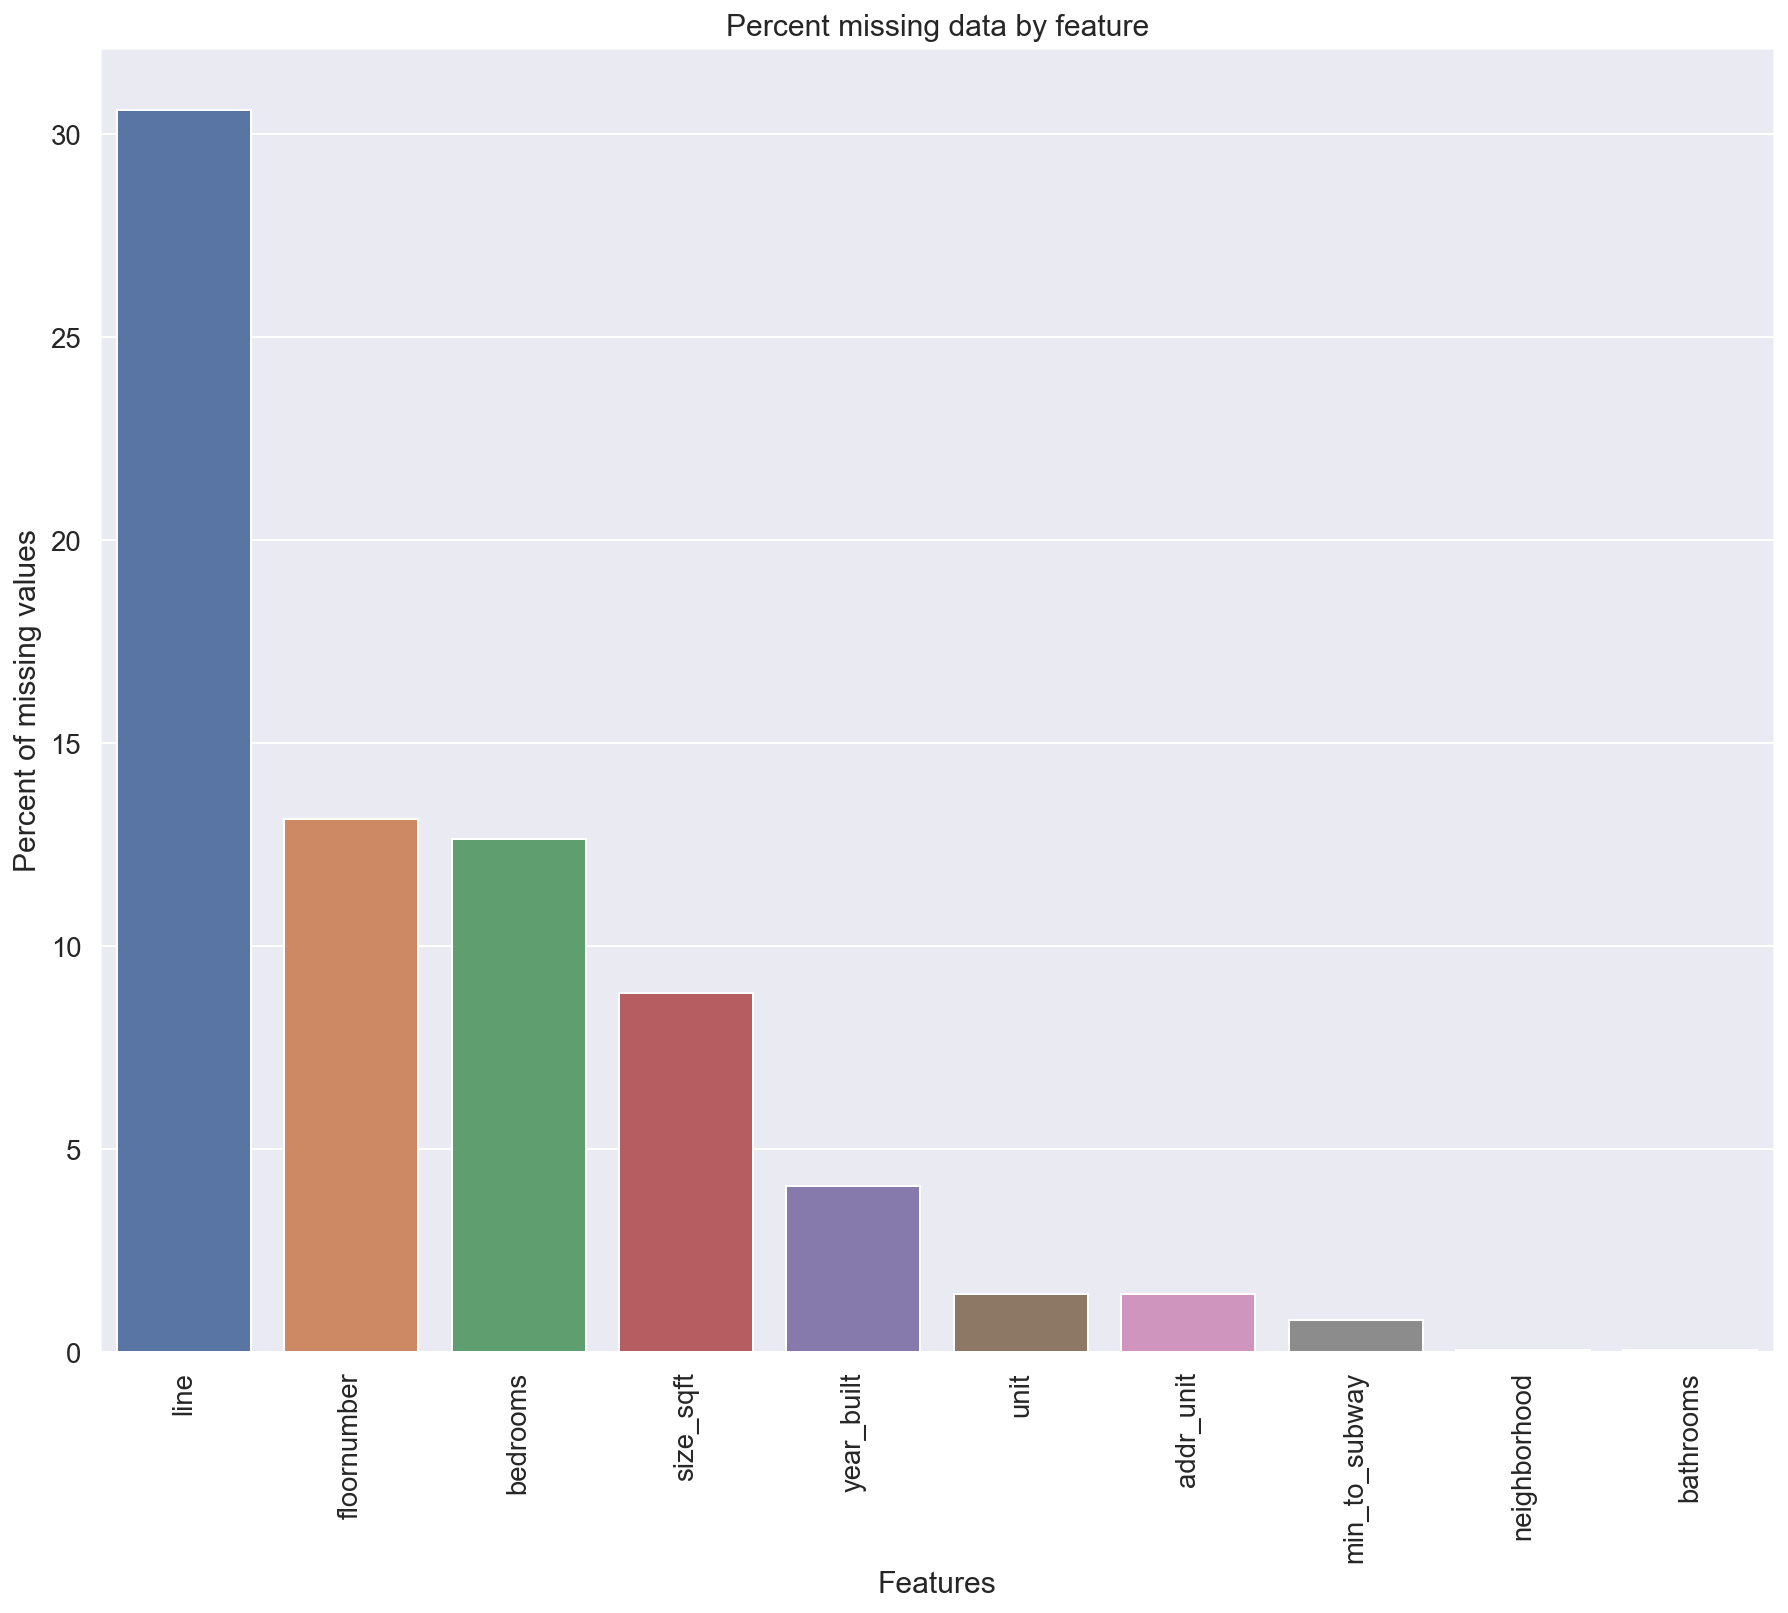

In [69]:
# Percent missing data by feature

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=submission_na.index, y=submission_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [70]:
# impute missing line values using zipcode and most frequent line in that area
submission_df['line'] = submission_df.groupby('addr_zip')['line'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))

#impute missing bedroom values with 1 as they were all 0 before 
submission_df['bedrooms'].fillna(1,inplace=True)

#impute floornumber missing values with mean floornumber
submission_df['floornumber'].fillna(submission_df['floornumber'].mean(),inplace=True)
submission_df['floornumber'].round(0)

#impute size_sqft missing values with mean size of # of bedrooms
submission_df['size_sqft'] = submission_df.groupby('bedrooms')['size_sqft'].transform(lambda x: x.fillna(x.mean()))

#impute year_built missing values with year_built mean of addr_zipcode
submission_df['year_built'] = submission_df.groupby('addr_zip')['year_built'].transform(lambda x: x.fillna(x.mean()))

#impute min_to_subway missing values with mean of addr_zipcode
submission_df['min_to_subway'] = submission_df.groupby('addr_zip')['min_to_subway'].transform(lambda x: x.fillna(x.mean()))

#impute unit missing values with column mean
submission_df['unit'].fillna(submission_df['unit'].mode()[0],inplace=True)

#impute addr_unit missing values with column mean
submission_df['addr_unit'].fillna(submission_df['addr_unit'].mode()[0],inplace=True)

#impute bathrooms missing values with 1 as they were 0 before
submission_df['bathrooms'].fillna(1,inplace=True)

#impute neighborhood missing values with addr_zip mode
submission_df['neighborhood'] = submission_df.groupby('addr_zip')['neighborhood'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))



In [71]:
#Check if there are any missing values left

submission_na = (submission_df.isnull().sum() / len(submission_df)) * 100
submission_na = submission_na.drop(submission_na[submission_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [72]:
# feature transoforming borough

print(submission_df['borough'].describe())
print(f"\n{submission_df['borough'].value_counts()}")
borough_rank_dic = {"Staten Island": 0,
                   "Bronx":1,
                   "Queens":2,
                   "Brooklyn":3,
                   "Manhattan":4}

submission_df.groupby('borough').count()

submission_df['borough_encoded'] = submission_df['borough'].map(borough_rank_dic)




count     2000     
unique    5        
top       Manhattan
freq      877      
Name: borough, dtype: object

Manhattan        877
Brooklyn         786
Queens           298
Bronx            35 
Staten Island    4  
Name: borough, dtype: int64


In [73]:
# feature transforming addr zip

print(submission_df['addr_zip'].describe())

submission_df['addr_zip_encoded'] = submission_df['addr_zip'].map(addr_zip_rank_dic)



count    2000.000000 
mean     10684.993500
std      589.143729  
min      10001.000000
25%      10023.000000
50%      11103.000000
75%      11217.000000
max      11693.000000
Name: addr_zip, dtype: float64


In [74]:
# imputing unknown values in addr_zip_encoded

bor_encoded_avg = submission_df.groupby('borough')['addr_zip_encoded'].mean().round(0).to_dict()

def impute_unknown(rental_id):
    submission_df.loc[submission_df['rental_id'] == rental_id,'addr_zip_encoded'] = bor_encoded_avg[submission_df.loc[submission_df['rental_id'] == rental_id,'borough'].values[0]] 

submission_df[submission_df['addr_zip_encoded'].isnull()]['rental_id'].transform(lambda x: impute_unknown(x))

submission_df[submission_df['addr_zip_encoded'].isnull()]



,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_garden,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded


In [75]:
# feature transforming neighborhoods

print(submission_df['neighborhood'].describe())

submission_df['neighborhood_encoded'] = submission_df['neighborhood'].map(neighborhood_rank_dic)

submission_df[submission_df['neighborhood_encoded'].isnull()]

count     2000           
unique    121            
top       Upper West Side
freq      144            
Name: neighborhood, dtype: object


,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
156,7497094,#2,1218613,3.0,1.0,1100.0,253 HUNTINGTON AVENUE,Bronx,10465,40.815731,...,0,0,Throgs Neck,Bronx,2,2.000000,0,1,42.0,NaN
789,7490203,#2,767881,3.0,1.0,1200.0,3815 OCEAN VIEW AVENUE,Brooklyn,11224,40.580617,...,0,1,Seagate,Brooklyn,2,2.000000,C,3,63.0,NaN
921,7435054,#BSMT,2105545,1.0,1.0,400.0,136-11 220 STREET,Springfield Gardens,11413,40.676232,...,0,0,Laurelton,Queens,BSMT,6.048647,0,2,62.0,NaN
1103,7442641,#APT1,18741022,1.0,1.0,700.0,133 ELSON STREET,Staten Island,10314,40.615398,...,0,0,Graniteville,Staten Island,APT1,1.000000,APT,0,46.0,NaN
1242,7442653,#APT1,18741019,1.0,1.0,700.0,131 ELSON STREET,Staten Island,10314,40.615501,...,0,0,Graniteville,Staten Island,APT1,1.000000,APT,0,46.0,NaN
1338,7521247,#2,942517,3.0,1.0,1000.0,2705 EAST 65 STREET,Brooklyn,11234,40.606373,...,0,0,Mill Basin,Brooklyn,2,2.000000,0,3,61.0,NaN
1788,7436953,#2,2122417,3.0,2.0,1250.0,146-21 230 PLACE,Springfield Gardens,11413,40.658647,...,0,0,Brookville,Queens,2,2.000000,0,2,62.0,NaN


In [76]:
# impute unknown neighborhoods

neigh_encoded_avg = submission_df.groupby('borough')['neighborhood_encoded'].mean().round(0).to_dict()

def impute_un(rental_id):
    submission_df.loc[submission_df['rental_id'] == rental_id,'neighborhood_encoded'] = neigh_encoded_avg[submission_df.loc[submission_df['rental_id'] == rental_id,'borough'].values[0]] 
    
submission_df[submission_df['neighborhood_encoded'].isnull()]['rental_id'].transform(lambda x: impute_un(x))

submission_df[submission_df['neighborhood_encoded'].isnull()]


,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded


In [77]:


feature_master =all_data_df[features].fillna(all_data_df[features].median(), axis=0)
target_master = np.concatenate((target_train,target_test))

best_est.fit(feature_master,target_master)

submission_df['predictions']= best_est.predict(submission_df[features])

In [78]:
submission_df[features+['predictions']]

,bedrooms,size_sqft,bathrooms,has_washer_dryer,has_doorman,floornumber,has_concierge,has_gym,borough_encoded,addr_zip_encoded,neighborhood_encoded,predictions
0,1.0,450.0000,1.0,0,0,4.000000,0,0,3,125.0,117.0,2336.795833
1,2.0,950.0000,1.0,0,0,6.048647,0,0,2,69.0,72.0,2562.575000
2,1.0,670.7875,1.0,0,0,1.000000,0,0,4,120.0,133.0,2952.350000
3,2.0,500.0000,1.0,0,0,5.000000,0,1,3,68.0,54.0,2316.937500
4,1.0,610.0000,1.0,0,0,11.000000,0,1,4,115.0,120.0,3585.012500
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,600.0000,1.0,0,0,4.000000,0,0,4,127.0,132.0,2498.791667
1996,1.0,670.7875,1.0,0,0,3.000000,0,0,4,117.0,121.0,2812.354167
1997,1.0,670.7875,1.0,0,0,6.048647,0,0,3,107.0,115.0,2197.112500
1998,1.0,900.0000,1.0,0,0,6.048647,0,1,3,89.0,96.0,2295.695833
